Mean IV Estimator (rho=0): -0.011
Variance of IV Estimator (rho=0): 0.392


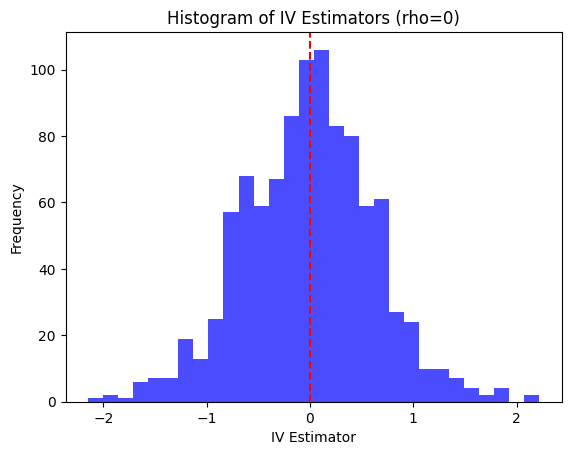

Mean IV Estimator (rho=0.75): 0.571
Variance of IV Estimator (rho=0.75): 0.366


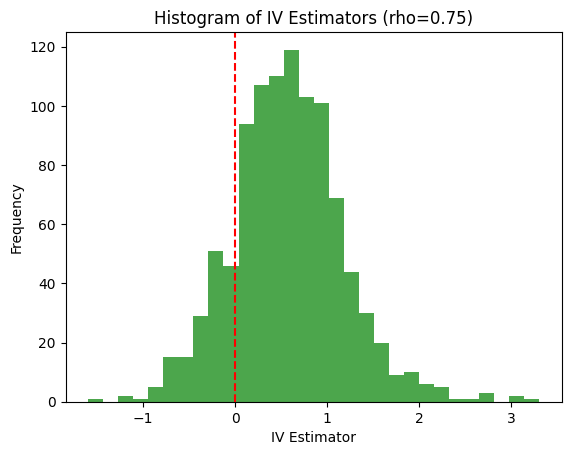

Summary of Findings:
(a) Mean IV Estimator (rho=0): -0.0009934058466399111
(a) Variance of IV Estimator (rho=0): 0.003611954932311584
(b) Mean IV Estimator (rho=0.75): 0.0036592645049303473
(b) Variance of IV Estimator (rho=0.75): 0.003581873175701165


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate samples for the IV estimator
def simgen(rho, n, mu, alpha, sigma1, gamma):
    Sigma = np.array([[sigma1**2, 0, rho*sigma1], [0, 1, 0], [rho*sigma1, 0, 1]])
    U = np.random.multivariate_normal(mu, Sigma, size=n)
    Z = np.random.binomial(1, 0.5, n)
    D = (gamma * Z >= U[:, 2]).astype(int)  # generate D_t according to (3)
    Y = alpha + D * U[:, 0] + U[:, 1]  # generate Y_t according to (2)

    # IV estimator
    IV = np.cov(Z, Y)[0, 1] / np.cov(Z, D)[0, 1]
    return IV

# Parameters
n = 500
S = 1000
mu = [0, 0, 0]
alpha = 0.2
sigma1 = 2
gamma = 0.75

# (a) set rho=0
np.random.seed(1)
result_rho0 = [simgen(0, n, mu, alpha, sigma1, gamma) for _ in range(S)]
mean_rho0 = np.mean(result_rho0)
var_rho0 = np.var(result_rho0)
print("Mean IV Estimator (rho=0):", round(mean_rho0, 3))
print("Variance of IV Estimator (rho=0):", round(var_rho0, 3))

# Plot histogram and save
plt.hist(result_rho0, bins=30, color='blue', alpha=0.7)
plt.xlabel('IV Estimator')
plt.ylabel('Frequency')
plt.title('Histogram of IV Estimators (rho=0)')
plt.axvline(mu[0], linestyle='--', color='red')  # Add dashed line at mu[0]
plt.savefig('/Users/veronica/Dropbox/Apps/Overleaf/EC_708_vcperez/figures/pset_1_iv_estimates_rho_0.png', dpi=300)
plt.show()

# (b) set rho=0.75
np.random.seed(1)
result_rho075 = [simgen(0.75, n, mu, alpha, sigma1, gamma) for _ in range(S)]
mean_rho075 = np.mean(result_rho075)
var_rho075 = np.var(result_rho075)
print("Mean IV Estimator (rho=0.75):", round(mean_rho075, 3))
print("Variance of IV Estimator (rho=0.75):", round(var_rho075, 3))

# Plot histogram and save
plt.hist(result_rho075, bins=30, color='green', alpha=0.7)
plt.xlabel('IV Estimator')
plt.ylabel('Frequency')
plt.title('Histogram of IV Estimators (rho=0.75)')
plt.axvline(mu[0], linestyle='--', color='red')  # Add dashed line at mu[0]
plt.savefig('/Users/veronica/Dropbox/Apps/Overleaf/EC_708_vcperez/figures/pset_1_iv_estimates_rho_075.png', dpi=300)
plt.show()

# (c) Summarize findings
print("Summary of Findings:")
print("(a) Mean IV Estimator (rho=0):", mean_iv_a)
print("(a) Variance of IV Estimator (rho=0):", var_iv_a)
print("(b) Mean IV Estimator (rho=0.75):", mean_iv_b)
print("(b) Variance of IV Estimator (rho=0.75):", var_iv_b)
